In [2]:
import pandas as pd # to read sql data into a pandas dataframe
import psycopg2 # to connect to SQL database
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import missingno as msno
import numpy as np
import folium


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df_housing = pd.read_csv('./data/_SELECT_kchd_kchs_date_kchs_price_FROM_king_county_house_details_202412181411.csv')

In [3]:
df_housing.head(15)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0.000,0.000,3,11,...,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000.000
6,1321400060,3.000,2.250,1715.000,6819.000,2.000,0.000,0.000,3,7,...,NaN,1995,0.000,98003,47.310,-122.327,2238.000,6819.000,2014-06-27,257500.000
7,2008000270,3.000,1.500,1060.000,9711.000,1.000,0.000,NaN,3,7,...,0.000,1963,0.000,98198,47.410,-122.315,1650.000,9711.000,2015-01-15,291850.000
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,730.000,1960,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000
9,3793500160,3.000,2.500,1890.000,6560.000,2.000,0.000,0.000,3,7,...,0.000,2003,0.000,98038,47.368,-122.031,2390.000,7570.000,2015-03-12,323000.000


In [4]:
df_housing.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
dtype: object

In [4]:
df_housing['date'] = pd.to_datetime(df_housing['date'], format='mixed')

In [54]:
df_housing.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [30]:
df_housing.price.unique()

array([221900., 538000., 180000., ..., 541800., 610685., 402101.],
      shape=(3622,))

In [5]:
df_housing.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [7]:
type(df_housing['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df_housing.dtypes

id                        int64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
dtype: object

In [ ]:
df_housing['waterfront'].unique()

array([nan,  0.,  1.])

In [12]:
df_housing['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [11]:
df_housing.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512,540296.574
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00,7700000.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140


In [11]:
dfgs = df_housing.groupby('view')
print(dfgs.mean()['price'])

view
0.000    496806.066
1.000    813373.267
2.000    791390.371
3.000    973285.197
4.000   1452465.883
Name: price, dtype: float64


From the above we can see that the value of properties with views generally goes up, with the interesting exception of properties with two view windows which are on average less valuable than properties with one.

<Axes: >

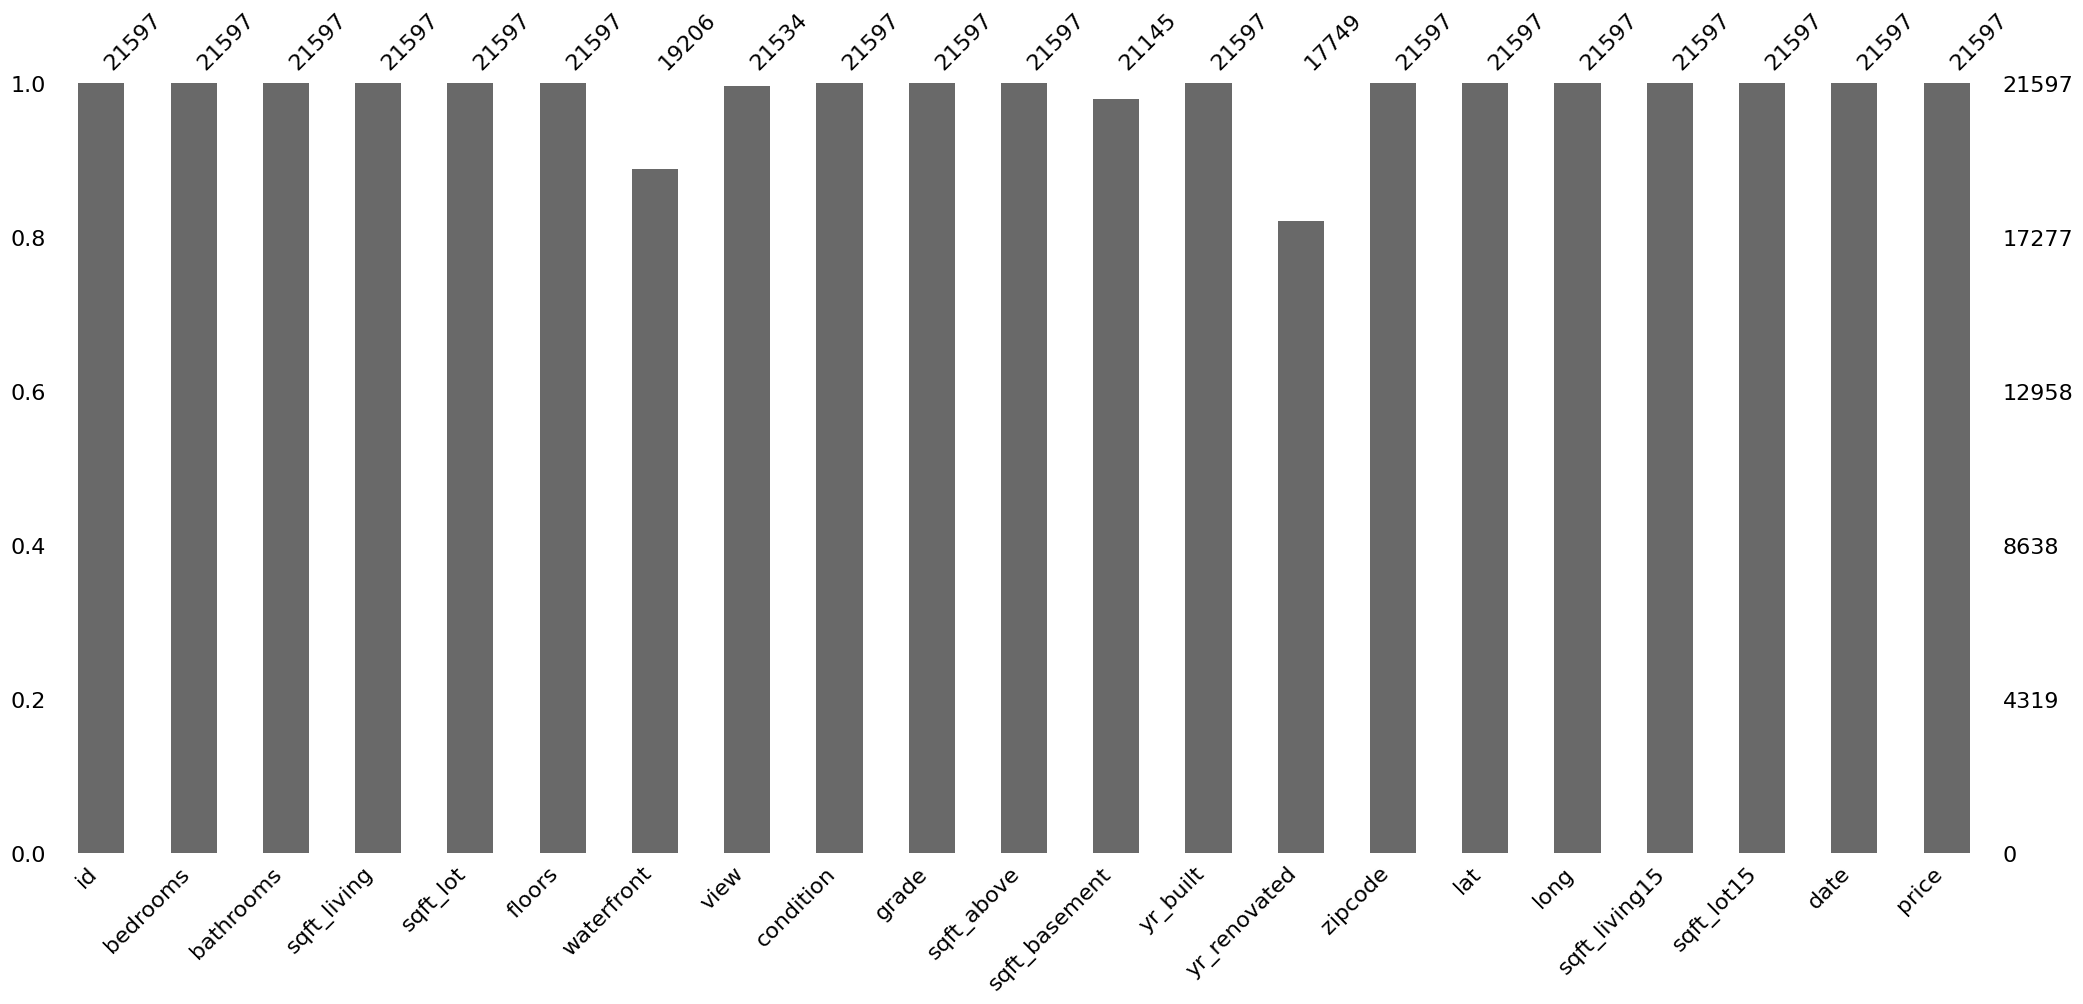

In [13]:
#show visually the missing values
msno.bar(df_housing)

<Axes: >

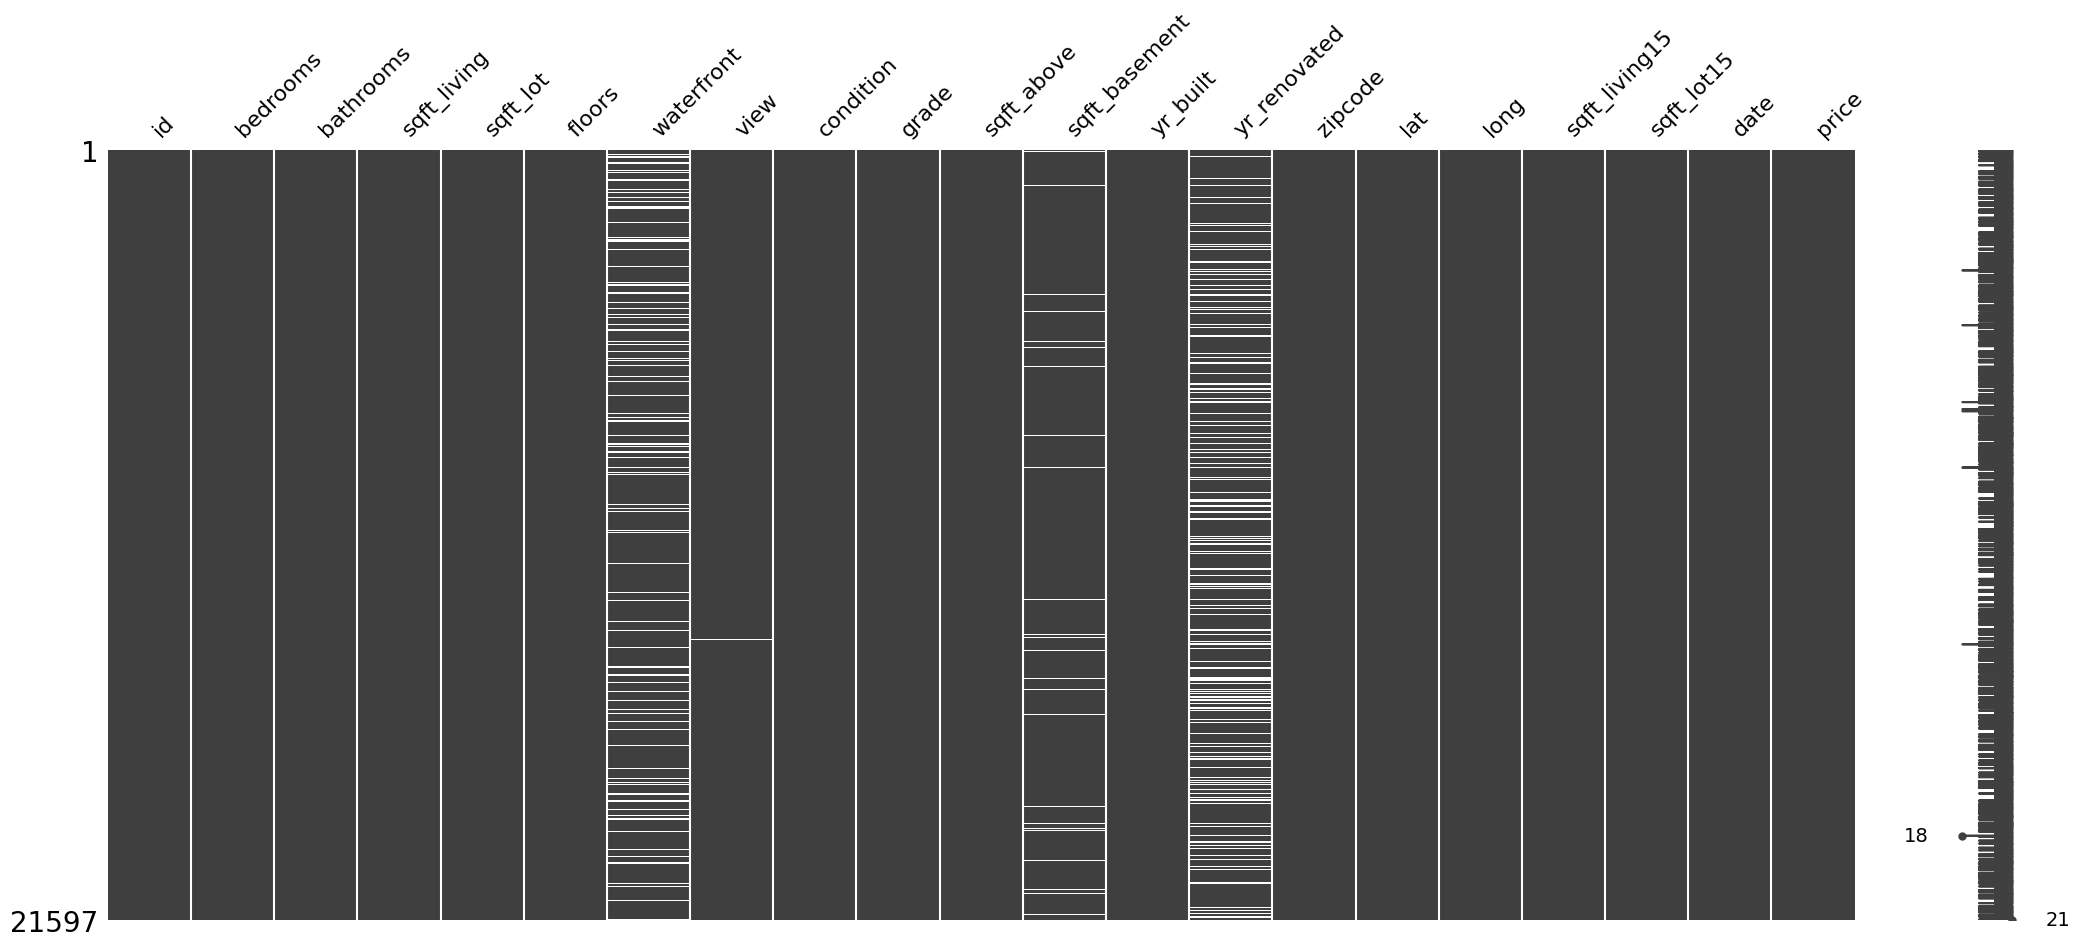

In [15]:
# try to figure out whether there is a pattern regarding the missing values.
# there does not appear to be any substantial correlation between properties that 
# lack a waterfront value and properties that lack a renovation value.
msno.matrix(df_housing)

In [17]:
#get a sense of the latitude and longitude (maximum)
max_lat = df_housing['lat'].max()
max_long = df_housing['long'].max()

# get a sense of the latitude and longitude (minimum)
min_lat = df_housing['lat'].min()
min_long = df_housing['long'].min()

print(f"Max Latitude: {max_lat}, Min Latitude: {min_lat}")
print(f"Max Longitude: {max_long}, Min Longitude: {min_long}")

Max Latitude: 47.7776, Min Latitude: 47.1559
Max Longitude: -121.315, Min Longitude: -122.519


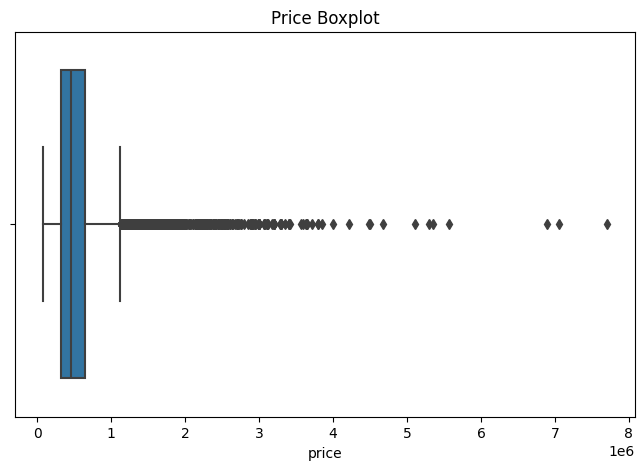

In [33]:
# Check the data to see if there are outliers in price range via a boxplot

sns.boxplot(x=df_housing['price'])
plt.title('Price Boxplot')
plt.show()

In [31]:
%run functions.ipynb

In [34]:
avg_price_water, avg_price_no_water, views_water, views_no_water = get_views(df_housing)

The average price for a scenic property with a waterfront view is $1450000.00
The average price for a scenic property without a waterfront view is $737500.00


So far, we know that the average price for a scenic property that's waterfront is more than double that of a scenic property that isn't. However, it's possible this conceals some differences in the data, as there can be up to 4 "view" features for a property. For that reason we will throw these up as box plots and compare with waterfront views that have the same 

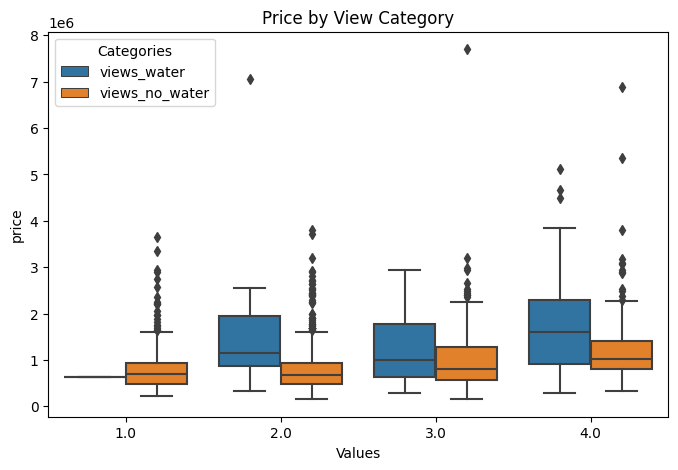

In [35]:
#check the rate of 
plot_the_views(df_housing, views_water, views_no_water)

In [40]:
#check what perceptage of the overall entries are grade 6

grade_6_percentage, lower_half_df, total_lower_half = housing_6_lower(df_housing)

Percentage of grade 6 entries in the lower half of prices: 14.31%


On the face of it it seems this hypothesis was false. I decided to generate a histogram to see what the actual value was:

/Users/tatlowdd/Desktop/Coriander_heatmap/Housing/eda-housing-data/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tatlowdd/Desktop/Coriander_heatmap/Housing/eda-housing-data/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/tatlowdd/Desktop/Coriander_heatmap/Housing/eda-housing-data/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to sil

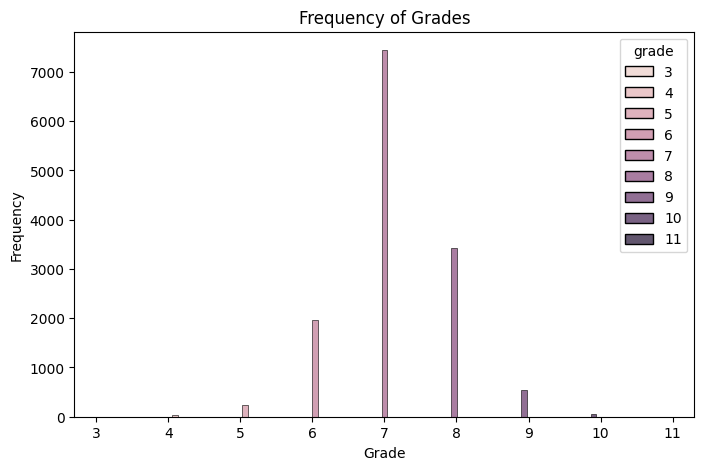

In [41]:
#generate a histogram showing how I was wrong and what the real answer is
hist_grades(lower_half_df)

Instead, grade "7" seemed to be the most common value for properties below the median value. 
The next hypothesis was that waterfront properties would have fewer bathrooms than non-waterfront properties. 

In [42]:
#The number of bathrooms per unit, grouped by waterfront status
average_bathrooms = df_housing.groupby('waterfront')['bathrooms'].median()

# Show the result
print(average_bathrooms)

waterfront
0.000   2.250
1.000   2.500
Name: bathrooms, dtype: float64


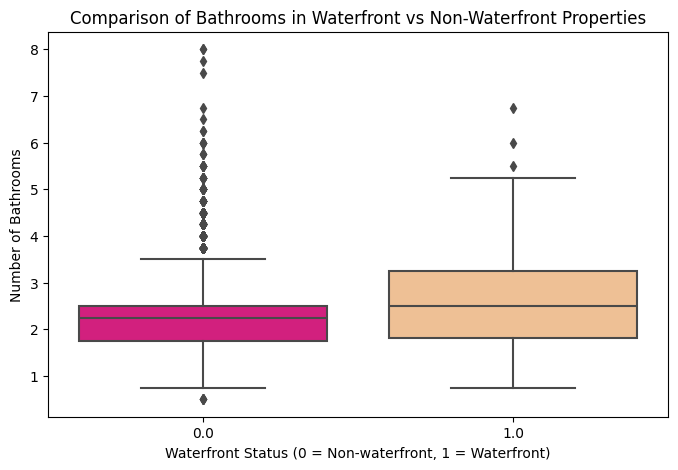

In [43]:
#draw up a boxplot to see this in more detail
plot_bathrooms_boxplot(df_housing)

It seems this hypothesis was also false! Even when calculating the median, waterfront properties had a closer to an average of 3 bathrooms than properties that weren't waterfront (2.113 vs. 2.709).

From here onwards, I started on making recommendations for Larry Sanders. Given his vague comment of "tight budget", I started by noting the median house price so that I could bear that in mind later, informally:

In [87]:
df_housing['price'].median()

np.float64(450000.0)

In [11]:
# starting with the assumption that neighbourhoods where the houses have fewer 
# df_housing[df_housing['bedrooms'] < 3]

mean_bedrooms_by_zip = df_housing.groupby('zipcode')['bedrooms'].mean().reset_index(name='mean_bedrooms')

# Filter zip codes where the median number of bedrooms is less than 3
zipcodes_with_fewer_bedrooms = mean_bedrooms_by_zip[mean_bedrooms_by_zip['mean_bedrooms'] < 3.00]

# Display the result
print(zipcodes_with_fewer_bedrooms)

    zipcode  mean_bedrooms
35    98070          2.778
45    98107          2.996
56    98126          2.836
58    98136          2.932
64    98168          2.996


I explored these neighbourhoods via Google Maps, and found that 98070 was Vashon Island and, at an hour's ferry from central Seattle, not central (though certainly more isolated).
98168 was entirely landlocked. 

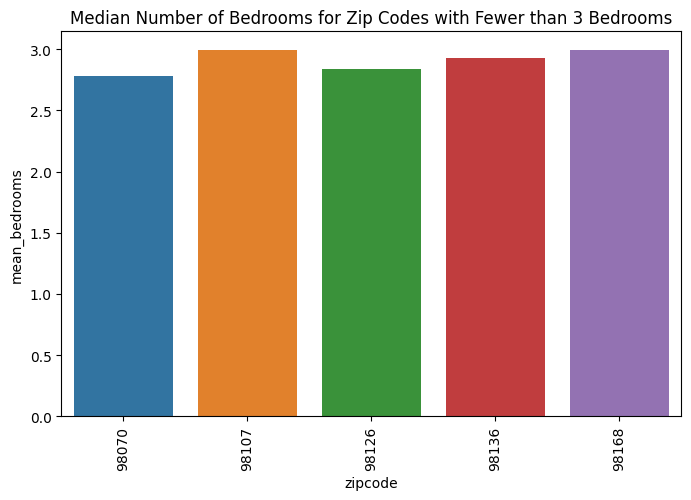

In [12]:
# Plot the median number of bedrooms by zip code
sns.barplot(x='zipcode', y='mean_bedrooms', data=zipcodes_with_fewer_bedrooms)
plt.title('Median Number of Bedrooms for Zip Codes with Fewer than 3 Bedrooms')
plt.xticks(rotation=90)
plt.show()

Now I will filter for Larry's waterfront interests. Note that while I have interpreted Larry as wanting fewer bedrooms for his neighbours, he has no such limitation for himself. 

In [ ]:
# Filter for waterfront properties in Larry's preferred zip codes
filtered_properties = df_housing[
    (df_housing['zipcode'].isin([98107, 98126, 98136])) &  # Zip codes                  
    (df_housing['waterfront'] == 1.0)                     # Waterfront properties
]

# See for ourselves what Larry can get
print(filtered_properties)

               id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
6471   7936500190     4.000      3.750     2130.000 34689.000   1.500   
11061  5154700060     4.000      2.750     3520.000 19200.000   1.000   
11103  7936500172     3.000      2.500     1970.000 23180.000   1.000   
14605  7936500109     3.000      3.000     3620.000 28064.000   2.000   
15357  7936500221     2.000      1.000     1010.000 14244.000   1.000   

       waterfront  view  condition  grade  ...  yr_renovated  zipcode    lat  \
6471        1.000 4.000          3      9  ...         0.000    98136 47.549   
11061       1.000 4.000          4      9  ...         0.000    98136 47.525   
11103       1.000 4.000          3      8  ...     19980.000    98136 47.550   
14605       1.000 4.000          5     10  ...         0.000    98136 47.552   
15357       1.000 4.000          1      5  ...         0.000    98136 47.548   

          long  sqft_living15  sqft_lot15        date       price  \
6471  -122.

Taking other factors into account, one option I can recommend Larry is a house on Beach Drive which, while nearly 205,000 over the median, fits many of his other criteria. Next, I removed the waterfront criterion in the hopes of finding him somewhere more affordable:

In [45]:
# Filter for all properties in Larry's preferred zip codes
filtered_properties = df_housing[
    (df_housing['zipcode'].isin([98107, 98126, 98136]))       #Zip codes           
]

# See for ourselves what Larry can get
print(filtered_properties)

               id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
3      2487200875     4.000      3.000     1960.000  5000.000   1.000   
14     1175000570     5.000      2.000     1810.000  4850.000   1.500   
15     9297300055     4.000      3.000     2950.000  5000.000   2.000   
37     2768000400     4.000      2.000     2360.000  6000.000   2.000   
89     3869900162     2.000      1.750     1030.000  1066.000   2.000   
...           ...       ...        ...          ...       ...     ...   
21526  3874900085     4.000      3.250     2630.000  7770.000   2.000   
21531  3277800823     2.000      2.000     1490.000  1627.000   2.000   
21540   476000017     2.000      2.000     1400.000  1512.000   2.000   
21570  2767604724     2.000      2.500     1430.000  1201.000   3.000   
21590  7936000429     4.000      3.500     3510.000  7200.000   2.000   

       waterfront  view  condition  grade  ...  yr_renovated  zipcode    lat  \
3           0.000 0.000          5      7  

There's a lot more results here! I'm going to sort them in descending order. 


In [47]:
sorted_properties = filtered_properties.sort_values(by='price', ascending=True)

# Display the cheapest 15 results
cheapest_properties = sorted_properties.head(20)
print(cheapest_properties)

               id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
13044  2853600155     1.000      1.000      640.000 10280.000   1.000   
13400  7454000145     2.000      1.000      740.000  6840.000   1.000   
6065   6911700066     2.000      1.000      670.000  2378.000   1.000   
8875   8122100835     2.000      1.000      670.000  5140.000   1.000   
10996  4363700200     4.000      1.000     1190.000  7920.000   1.000   
16815  3278602660     1.000      1.000      820.000  1060.000   1.000   
13524  9505100035     2.000      1.000     1250.000  8520.000   1.000   
16078  8122600020     4.000      1.000     1310.000  5200.000   1.500   
902    3278600710     1.000      1.500     1010.000  1157.000   2.000   
880    2349300060     4.000      2.000     1920.000  4822.000   1.000   
3017   7454000110     2.000      1.000      670.000  7844.000   1.000   
12211  5347200162     2.000      1.500      880.000  1157.000   2.000   
241    8150100045     2.000      1.000      830.000

Without scrolling I wanted to get a sense of how many of these were around or under the median property price:

In [ ]:
# find out quickly how many are near the median
properties_under_500k = sorted_properties[sorted_properties['price'] < 500000]
count_under_500k = len(properties_under_500k)

# Print the result
print(f"The number of properties under $500,000 is: {count_under_500k}")

The number of properties under $500,000 is: 502


This easily generates fifteen properties less than half the median price--these would be particularly suitable if Larry is open to making his children (plural) share a bedroom.

In conclusion, I would suggest that Larry instead compromise (somewhat) on centrality, and consider a property on Vashon Island 

In [29]:
#call up the properties on Vasho
df_vasho = df_housing[
    (df_housing['zipcode'].isin([98070])) &       #Zip codes
          (df_housing['waterfront'] == 1.0)         #waterfront        
]

#sort those properties by cheapest price
df_vasho_cheap = df_vasho.sort_values(by='price', ascending=True)
print(df_vasho_cheap)


               id  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
18261  2781600195     1.000      1.000     1060.000  54846.000   1.000   
1166   3523029041     2.000      0.750      440.000   8313.000   1.000   
16556  2923039243     4.000      1.000     1200.000  11834.000   1.000   
6096    222029026     2.000      0.750     1060.000  48292.000   1.000   
264    2123039032     1.000      0.750      760.000  10079.000   1.000   
18987  5216200090     2.000      1.000      830.000  26329.000   1.000   
8270    221029019     3.000      2.500     2090.000  32718.000   2.000   
14813  2423029009     2.000      2.000     1494.000  19271.000   2.000   
1947   1922039062     2.000      1.500     1008.000  26487.000   1.000   
18023  7003200120     2.000      0.750      840.000  40642.000   1.000   
4907    121029034     2.000      1.000     2034.000  13392.000   1.000   
14457  7558800620     2.000      1.750     1550.000   7764.000   1.000   
19089   594000115     2.000      1.750

This is promising! Vashon has a low bedroom average, is "isolated", and has at least eight waterfront properties going for below the median price for a house in King County.

In [52]:
# Calculate distance from Seattle city centre 

from haversine import haversine, Unit
seattle_centre = (47.621014, -122.333289)
df_housing['lat_long'] = df_housing.apply(lambda row: (row['lat'], row['long']), axis=1)
df_housing['distance_centre'] = df_housing.apply(lambda row: haversine(seattle_centre, row['lat_long'], unit=Unit.MILES), axis=1)